In [1]:
import pickle

with open('/home/porepy/volume/egc_stuff/Fracture-reactivation-in-geothermal-reservoirs/bmat.pkl', 'rb') as f:
    bmat, rhs = pickle.load(f)

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


In [2]:
bmat = bmat[:]

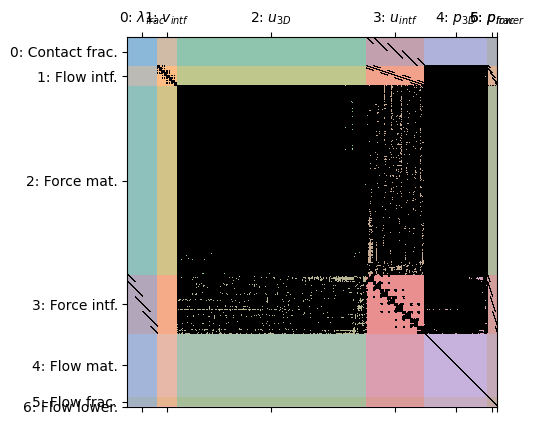

In [3]:
bmat.color_spy()

In [4]:
Jmech = bmat[[2,3]]

In [33]:
from full_petsc_solver import PetscKSPScheme, PetscFieldSplitScheme

scheme = PetscKSPScheme(
    petsc_options={
        'ksp_monitor': None,
    },
    preconditioner=PetscFieldSplitScheme(
        # groups=[3],
        # elim_options={
        #     'pc_type': 'ilu',
        # },
        # complement=PetscFieldSplitScheme(
            groups=[2],
            block_size=3,
            elim_options={
                'pc_type': 'ilu',
                # 'pc_'
                # 'pc_type': 'gamg',
                # 'mg_levels_pc_type': 'sor',
                # 'mg_levels_pc_sor_omega': 0.9,
                # "mg_levels_ksp_type": "richardson",
                # "mg_levels_ksp_max_it": 1,
                # "mg_levels_pc_type": "ilu",
                'pc_factor_levels': 2,
            }
        ),
    # )
)
solver = scheme.make_solver(Jmech)

In [34]:
solver.solve(Jmech.project_rhs_to_local(rhs))

  0 KSP Residual norm 2.494755085355e+01 
  1 KSP Residual norm 8.479454720814e+00 
  2 KSP Residual norm 7.983330490604e+00 
  3 KSP Residual norm 7.976230933412e+00 
  4 KSP Residual norm 5.168746231938e+00 
  5 KSP Residual norm 4.747686631903e+00 
  6 KSP Residual norm 3.826508737939e+00 
  7 KSP Residual norm 3.814593020903e+00 
  8 KSP Residual norm 3.705339149531e+00 
  9 KSP Residual norm 3.606968100701e+00 
 10 KSP Residual norm 2.377143257541e+00 
 11 KSP Residual norm 2.120762860568e+00 
 12 KSP Residual norm 2.106289742877e+00 
 13 KSP Residual norm 1.392562577148e+00 
 14 KSP Residual norm 1.320277185377e+00 
 15 KSP Residual norm 1.295613858894e+00 
 16 KSP Residual norm 1.272924501990e+00 
 17 KSP Residual norm 1.271044688817e+00 
 18 KSP Residual norm 1.252193078314e+00 
 19 KSP Residual norm 1.201923319753e+00 
 20 KSP Residual norm 1.199456069412e+00 
 21 KSP Residual norm 1.063028142784e+00 
 22 KSP Residual norm 8.763604891444e-01 
 23 KSP Residual norm 8.5418531482

array([ 0.00690819,  0.00530049, -0.13941144, ...,  0.00611317,
        0.00167075, -0.0841305 ])

In [32]:
Jmech[[2]].shape

(64974, 64974)

In [1]:
from mpi4py import MPI

In [5]:
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()
size, rank

(1, 0)

In [ ]:
comm.sendrecv